# 3.1 Modèle sous Tensorflow

## Préparation

Importation des librairies

In [14]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, mean_absolute_error, mean_squared_error, f1_score, classification_report, log_loss
from tensorflow import keras
#from tensorflow.keras import layers

Importation du dataset

In [15]:
df = pd.read_pickle('./Datasets/complete_dataset_one_hot_with_scaling.pkl')

Séparation en jeu de train et test

In [16]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Matrice de corrélation

In [17]:
# Fonction de génération de graphiques de corrélation
def plot_correlation_map( df, Size=25 ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( Size , Size ) )
    triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        mask=triangle_mask,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
    )

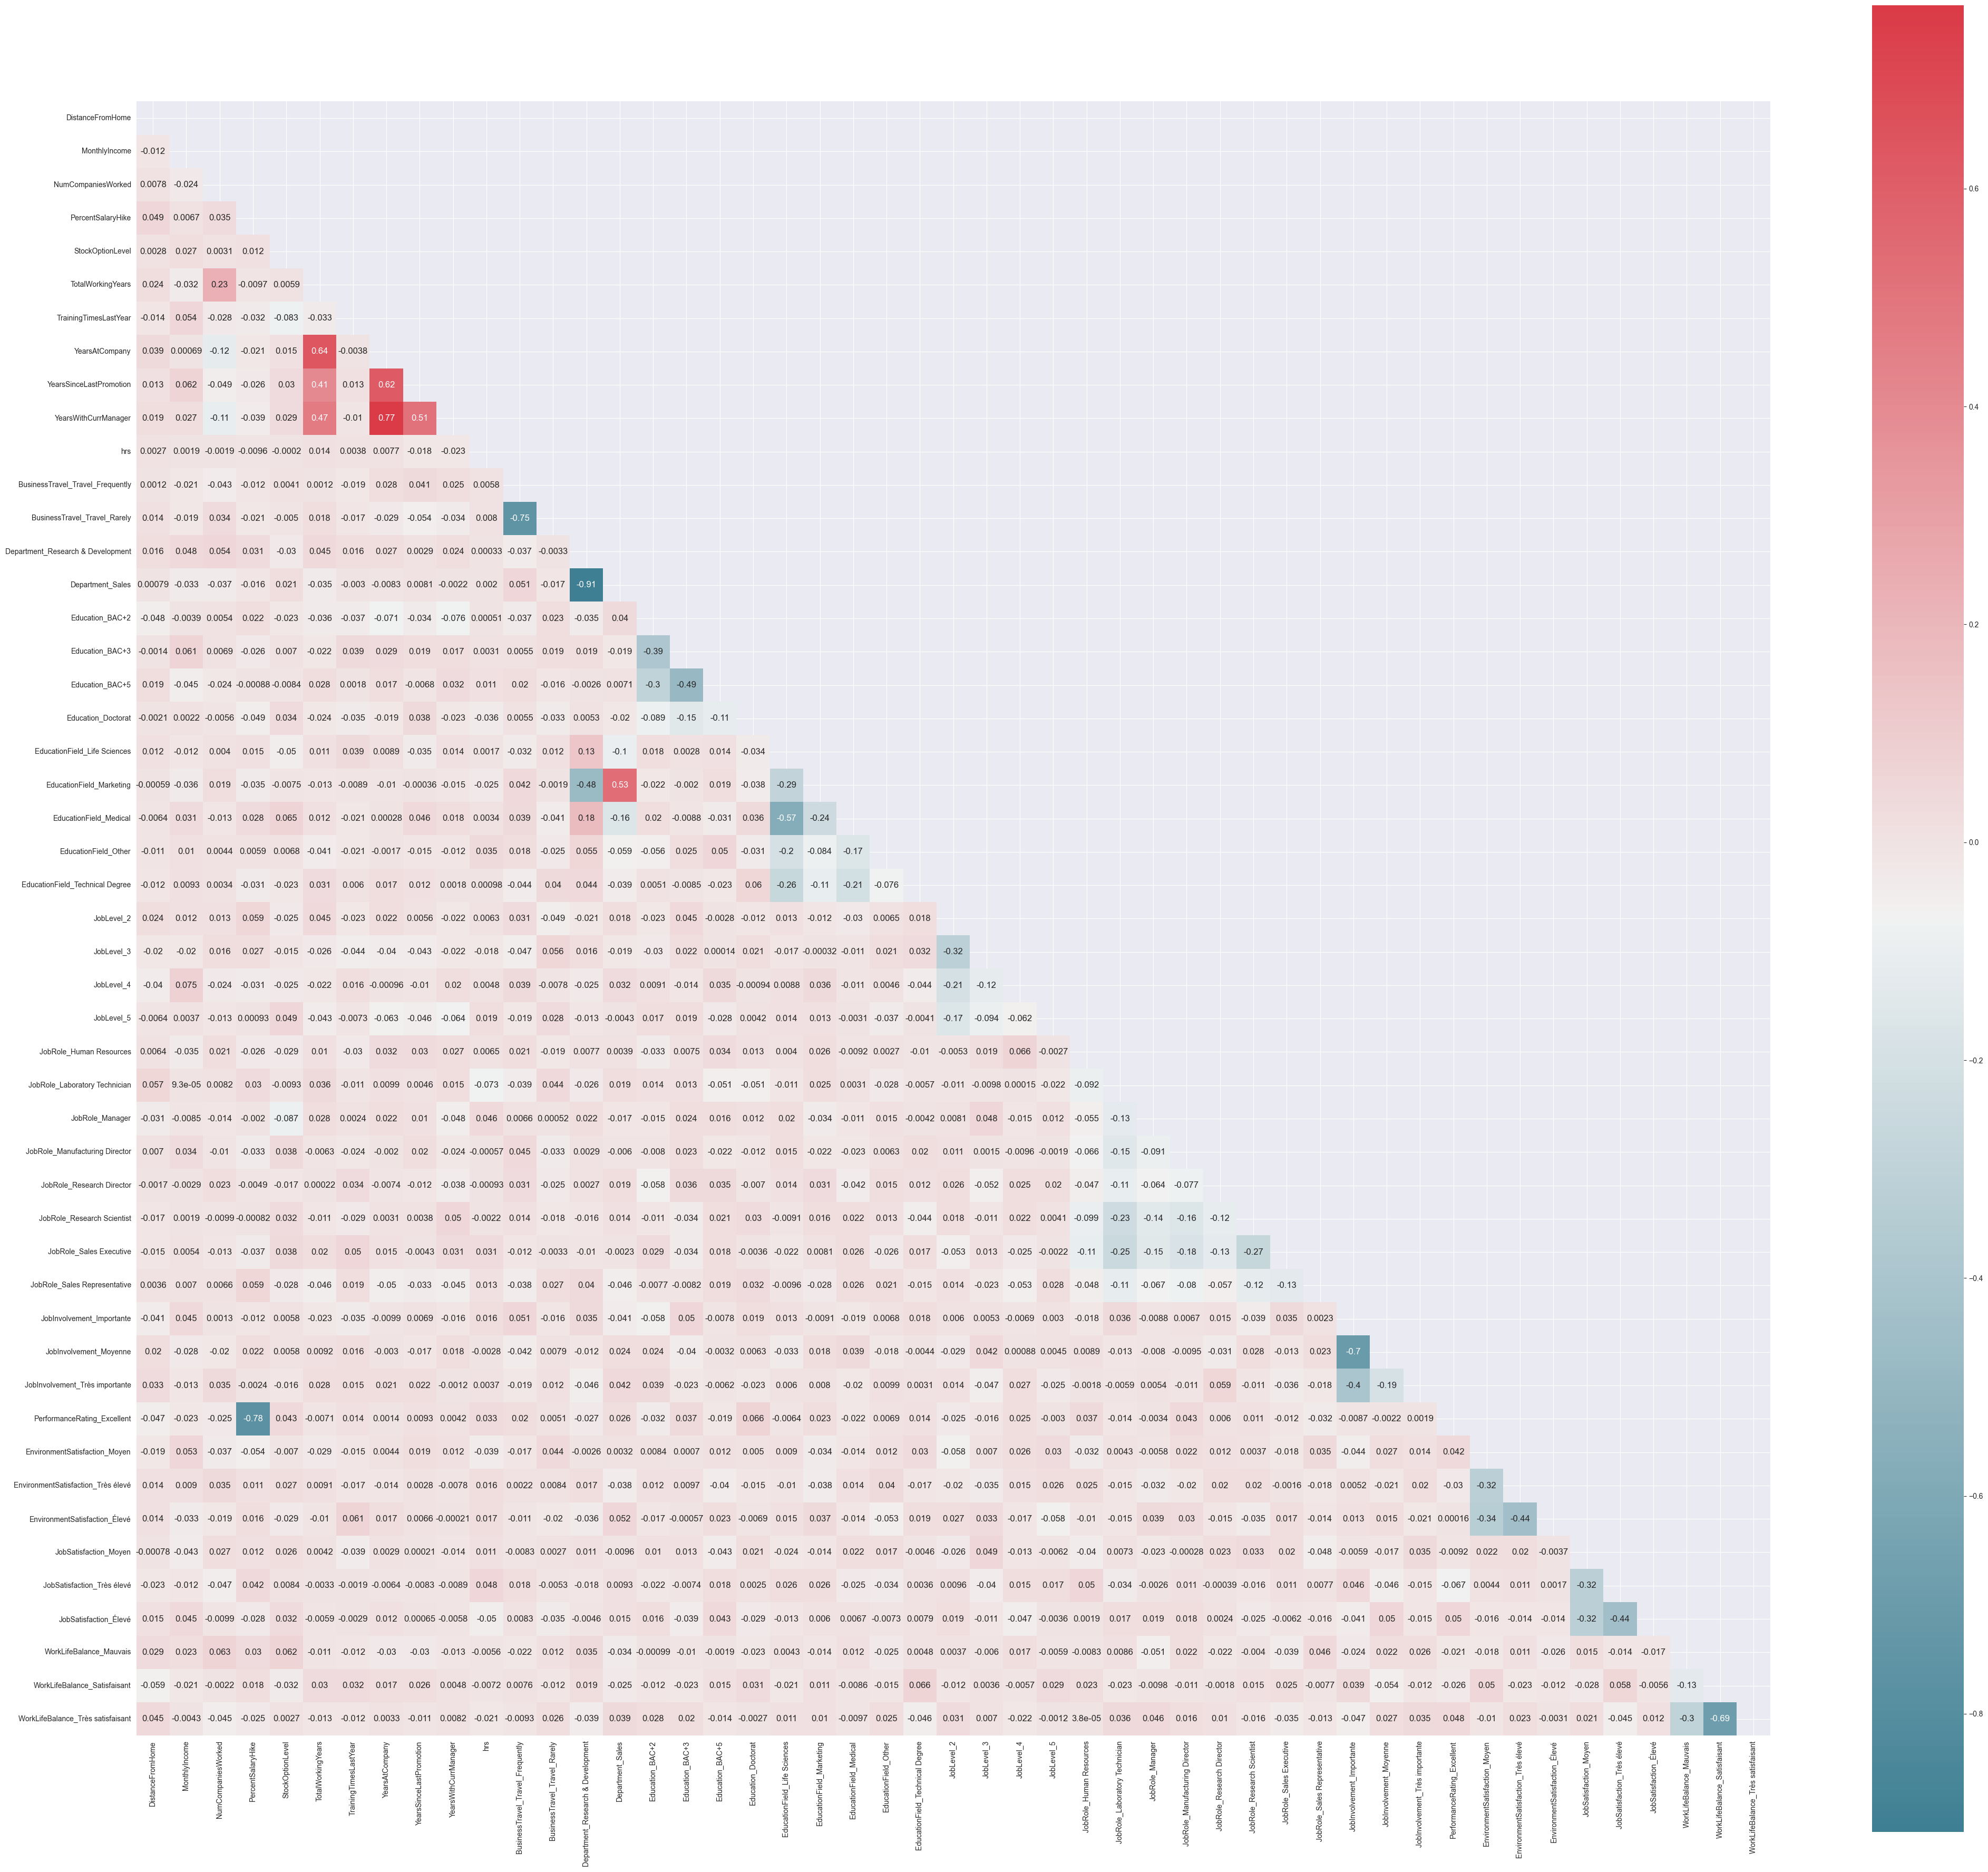

In [18]:
# Plot the matrix
plot_correlation_map(X_train,50)

Vérification de la forme des sets

In [19]:
X_train

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,PerformanceRating_Excellent,EnvironmentSatisfaction_Moyen,EnvironmentSatisfaction_Très élevé,EnvironmentSatisfaction_Élevé,JobSatisfaction_Moyen,JobSatisfaction_Très élevé,JobSatisfaction_Élevé,WorkLifeBalance_Mauvais,WorkLifeBalance_Satisfaisant,WorkLifeBalance_Très satisfaisant
655,0.347126,-0.466801,-0.277692,-1.150723,1.415759,1.893685,0.156362,2.776278,-0.368619,1.928457,...,1,0,0,0,1,0,0,0,0,1
4338,0.223671,0.106618,-0.678721,1.309108,1.415759,1.250554,-0.619989,2.122844,2.114561,1.367694,...,0,0,1,0,0,0,1,0,0,1
3218,-0.146696,-0.249458,2.128485,1.309108,-0.932212,-0.164335,0.156362,-0.817607,-0.058222,-0.594976,...,0,0,0,0,0,0,0,0,0,1
4210,0.100215,1.007217,0.123338,-0.877408,0.241773,-0.164335,0.156362,-0.000815,-0.368619,0.806931,...,1,0,1,0,0,1,0,0,1,0
1128,-0.887430,-0.939727,-1.079751,-0.604094,-0.932212,-0.421587,2.485416,-0.000815,1.493766,0.526550,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,-0.887430,-0.357386,1.326426,-0.330779,1.415759,-0.678839,-0.619989,-0.654249,-0.368619,-0.594976,...,1,0,0,0,0,0,0,0,0,1
466,2.322417,1.135753,-0.678721,0.215850,0.241773,-0.807466,0.156362,-0.490890,0.252176,-0.594976,...,1,0,1,0,0,0,1,0,0,1
3092,1.952050,-0.870466,-0.277692,1.309108,0.241773,-0.035708,1.709065,-0.327532,-0.679016,-0.594976,...,0,0,0,1,0,1,0,0,0,1
3772,-1.010886,-0.890012,0.123338,-0.604094,-0.932212,-0.292961,1.709065,-0.000815,-0.679016,0.806931,...,1,0,0,1,0,0,0,0,0,1


In [20]:
X_test

,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,PerformanceRating_Excellent,EnvironmentSatisfaction_Moyen,EnvironmentSatisfaction_Très élevé,EnvironmentSatisfaction_Élevé,JobSatisfaction_Moyen,JobSatisfaction_Très élevé,JobSatisfaction_Élevé,WorkLifeBalance_Mauvais,WorkLifeBalance_Satisfaisant,WorkLifeBalance_Très satisfaisant
2983,-0.270152,-0.571754,-0.678721,-0.057465,-0.932212,-1.450597,0.156362,-1.144324,-0.679016,-1.155739,...,1,0,1,0,0,0,1,0,0,1
1499,-0.887430,-0.436632,2.529514,-0.877408,-0.932212,-0.164335,0.156362,-0.817607,-0.368619,-0.594976,...,1,0,1,0,0,1,0,0,0,1
4112,1.334772,-0.950562,0.123338,-1.150723,0.241773,1.121927,0.156362,1.796127,-0.368619,1.928457,...,1,1,0,0,0,0,1,0,0,1
478,-0.763975,-0.231187,1.727455,-1.150723,0.241773,2.022311,-1.396341,1.306052,0.562573,1.087313,...,1,0,0,1,0,0,1,0,0,1
530,-1.010886,0.202647,0.123338,-1.150723,1.415759,-0.164335,-1.396341,0.162543,-0.368619,0.806931,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,0.840949,-0.873016,-0.678721,0.215850,0.241773,-0.292961,0.156362,0.325902,-0.368619,0.806931,...,1,0,0,1,0,1,0,0,0,1
1727,-0.887430,2.599785,-0.678721,1.035793,0.241773,-1.321970,-0.619989,-0.980966,-0.679016,-1.155739,...,1,0,0,1,0,0,1,0,0,1
321,-0.887430,0.809209,-0.678721,-0.877408,-0.932212,-0.678839,-0.619989,-0.164174,-0.368619,-0.314594,...,1,0,0,1,0,0,0,0,0,1
897,-0.887430,0.161644,-1.079751,0.489164,-0.932212,-0.035708,1.709065,0.489260,-0.679016,0.806931,...,1,0,0,1,0,0,1,0,0,1


## Création du modèle

Epoch 1/200
28/28 [==============================] - 3s 20ms/step - loss: 0.7991 - auc: 0.5750 - binary_accuracy: 0.5716 - val_loss: 0.5275 - val_auc: 0.7684 - val_binary_accuracy: 0.8515
Epoch 2/200
28/28 [==============================] - 0s 8ms/step - loss: 0.5770 - auc: 0.6865 - binary_accuracy: 0.7046 - val_loss: 0.4545 - val_auc: 0.8065 - val_binary_accuracy: 0.8515
Epoch 3/200
28/28 [==============================] - 0s 8ms/step - loss: 0.4460 - auc: 0.7848 - binary_accuracy: 0.7964 - val_loss: 0.4025 - val_auc: 0.8108 - val_binary_accuracy: 0.8515
Epoch 4/200
28/28 [==============================] - 0s 8ms/step - loss: 0.3800 - auc: 0.8303 - binary_accuracy: 0.8415 - val_loss: 0.3704 - val_auc: 0.8464 - val_binary_accuracy: 0.8515
Epoch 5/200
28/28 [==============================] - 0s 9ms/step - loss: 0.3409 - auc: 0.8509 - binary_accuracy: 0.8523 - val_loss: 0.3430 - val_auc: 0.8705 - val_binary_accuracy: 0.8549
Epoch 6/200
28/28 [==============================] - 0s 9ms/step

<Axes: title={'center': 'AUC'}>

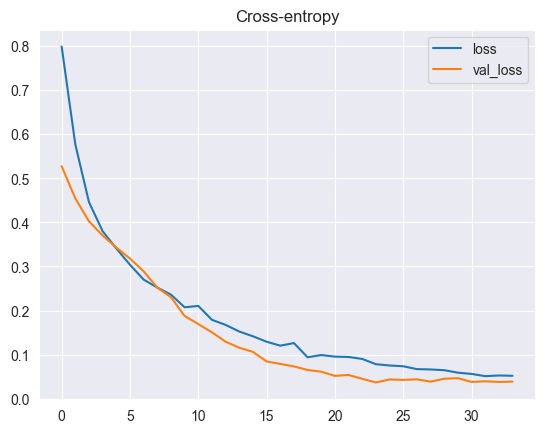

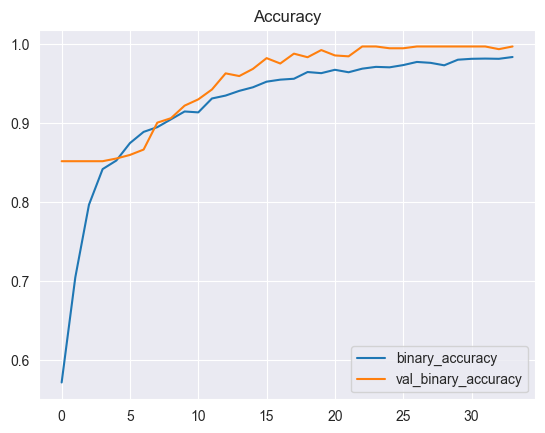

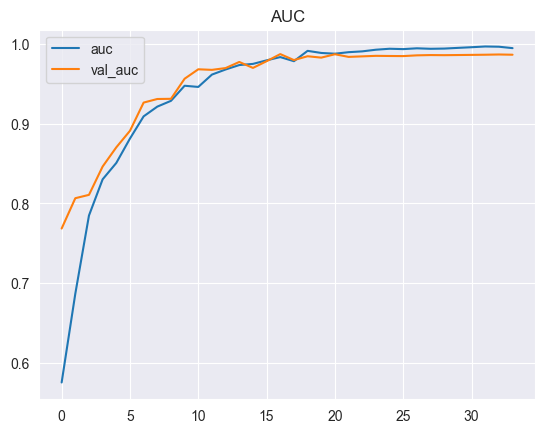

In [21]:
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(256, activation='gelu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='gelu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='gelu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC', 'binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

training =  model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(training.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
history_df.loc[:, ['auc', 'val_auc']].plot(title="AUC")

In [22]:
# Test predictions
test_inference = model.predict(X_test)
test_inference = np.where(test_inference > 0.5, 1, 0)
# get confusion matrix
confusion_matrix(y_test, test_inference)

28/28 [==============================] - 0s 1ms/step


array([[751,   0],
       [  3, 128]], dtype=int64)

Vérification de la précision sur le set de train

In [23]:
# print classification metrics
print(classification_report(y_test, test_inference))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      0.98      0.99       131

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



F1 Score

In [24]:
print('F1 Score: %.3f' % f1_score(y_test, test_inference))

F1 Score: 0.988


MAE & RMSE

In [25]:
print('MAE: %.3f' % mean_absolute_error(y_test, test_inference))
print('RMSE: %.3f' % mean_squared_error(y_test, test_inference))

MAE: 0.003
RMSE: 0.003


Liste des features les plus importantes

<Axes: >

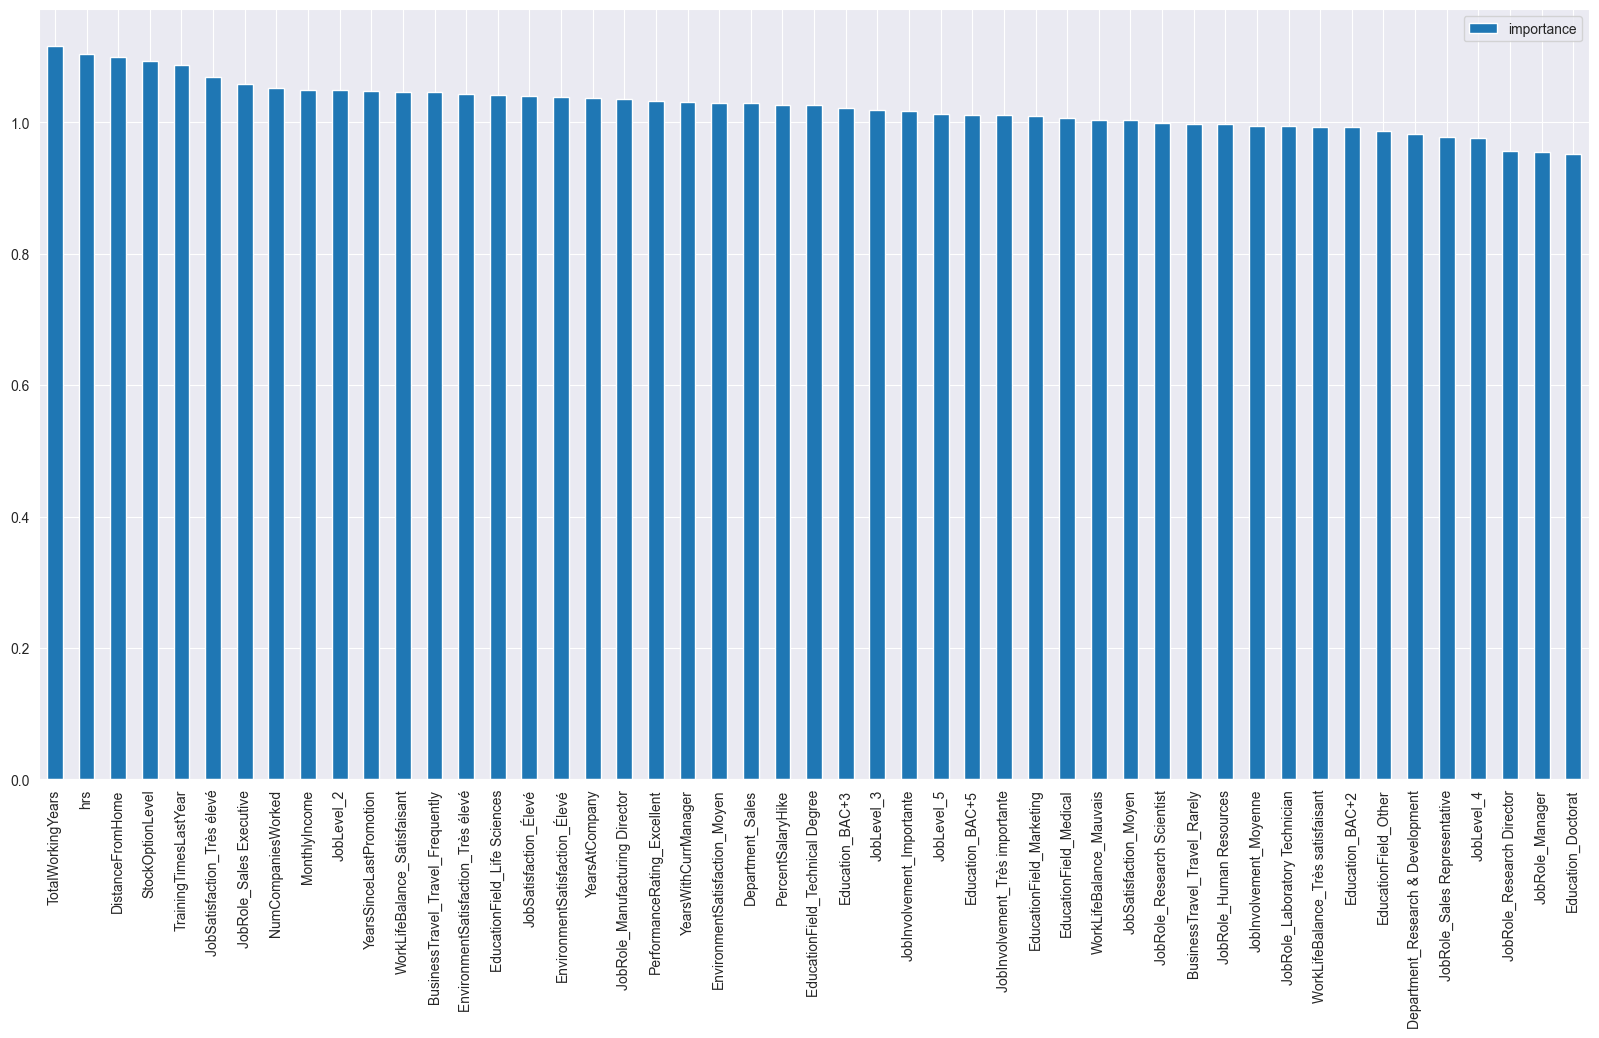

In [26]:
# Plot feature importance to see what can put attrition to yes
feature_importance = pd.DataFrame(model.layers[0].get_weights()[0], index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance.plot(kind='bar', figsize=(20,10))